In [4]:
from pyjoystick.sdl2 import Key, Joystick, run_event_loop
from pprint import pprint
from threading import Thread
import time
import serial
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import linear_model

In [2]:
A_t = ([0, 0, 4.143782580740414, 0, 50.811409612732675, 22.95447005416938], [0, 0, 0, 41.43100282769335, 2.2411836712706474, 0])

In [9]:
np.array(A_t)[0,2]

4.143782580740414

In [73]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
# set blue thresh
lower_green = np.array([35,70,60])
upper_green = np.array([120,255,255])

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 1, fy = 1, interpolation = cv2.INTER_AREA)
    cv2.imshow('frame', frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # edges = cv2.Canny(mask, 100, 200)
    cv2.imshow('green edges', mask)
    if (cv2.waitKey(30) == 27):
        break

cap.release()
cv2.destroyAllWindows()

In [74]:
edges = mask

In [75]:
np.shape(edges), edges[400, 600]

((480, 640), 0)

In [76]:
greenpos0 = []
greenpos1 = []
for (index0,liste) in enumerate(edges):
    for (index1,value) in enumerate(liste):
        if value == 255:
            greenpos0.append(index0)
            greenpos1.append(index1)
            # print(value)

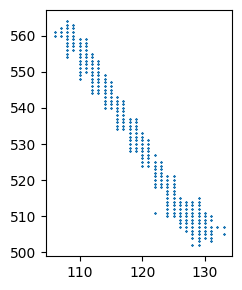

In [77]:
plt.figure(figsize = (2.4, 3.2))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

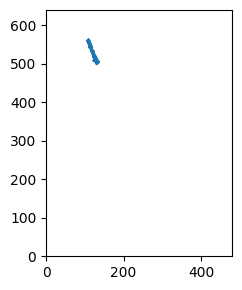

In [78]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [79]:
ransac = linear_model.RANSACRegressor()
ransac.fit(np.array(greenpos0).reshape(-1, 1), np.array(greenpos1).reshape(-1, 1))

line_X = np.arange(min(greenpos0), max(greenpos0) + 1)[:, np.newaxis]
line_y = ransac.predict(line_X)

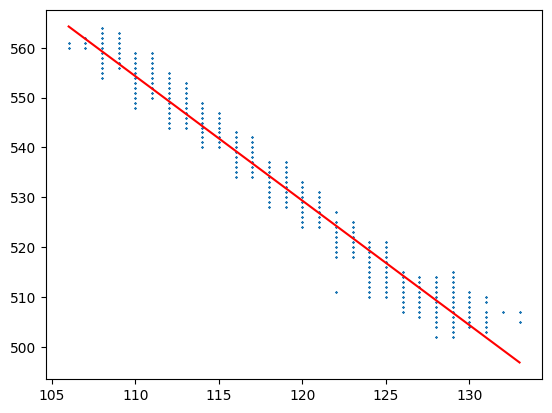

In [80]:
# plt.figure(figsize = (4.8, 6.4))
# plt.xlim((0, 480))
# plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

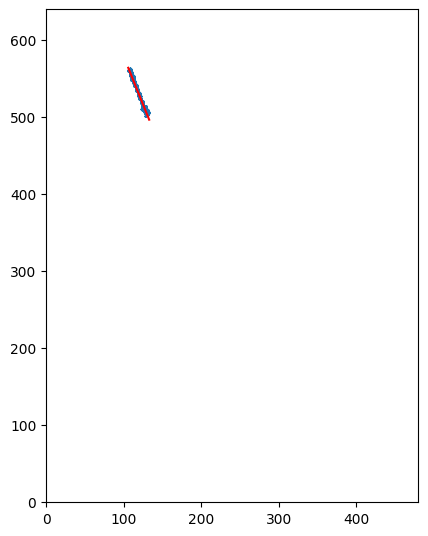

In [81]:
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [82]:
inlier_mask = ransac.inlier_mask_

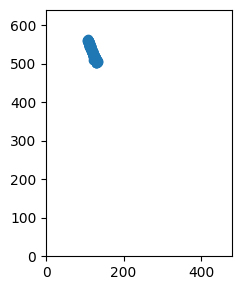

In [83]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(np.array(greenpos0).reshape(-1, 1)[inlier_mask], np.array(greenpos1).reshape(-1, 1)[inlier_mask])

In [84]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][-1,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][-1,0]))

524.1545573588004

In [85]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][0,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]))

569.9438568841672

In [88]:
np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]

560

In [2]:
Servo_t = [0, 29.85799098, 87.28123918, 49.99237628, 23.27381264], [54.25188891, 14.62139926, 51.21600907, 64.9204633, 113.30784031]

A_t = [[-0.96566657, 0.49763318, 0.95705414, -0.62148105, -0.44530939], [0.90419815, -0.66050816, 0.60991016, 0.22840757, 0.80645628]]

s_t = [[391, 402, 363, 365, 325], [360, 320, 441, 434, 471]]

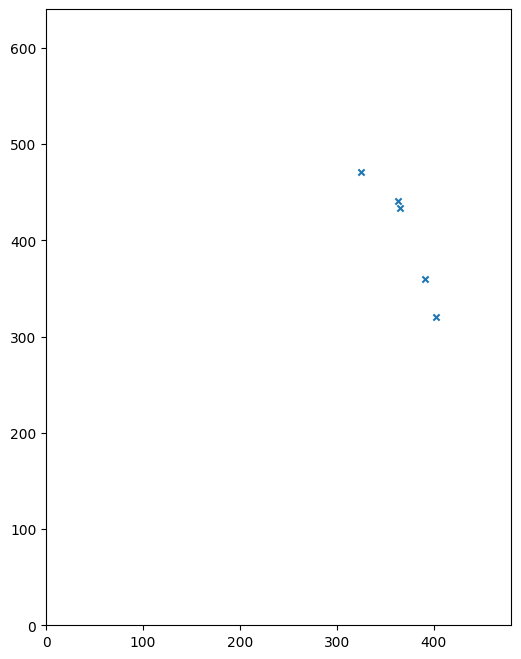

In [13]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

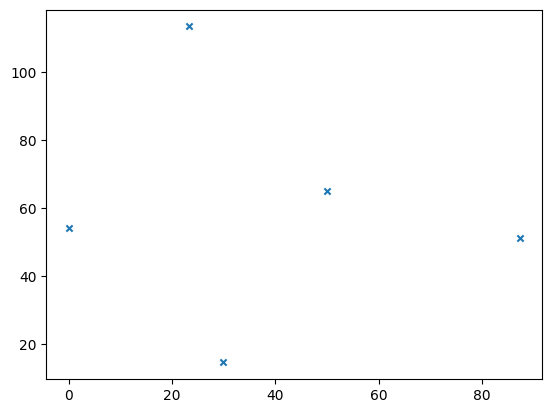

In [14]:
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')

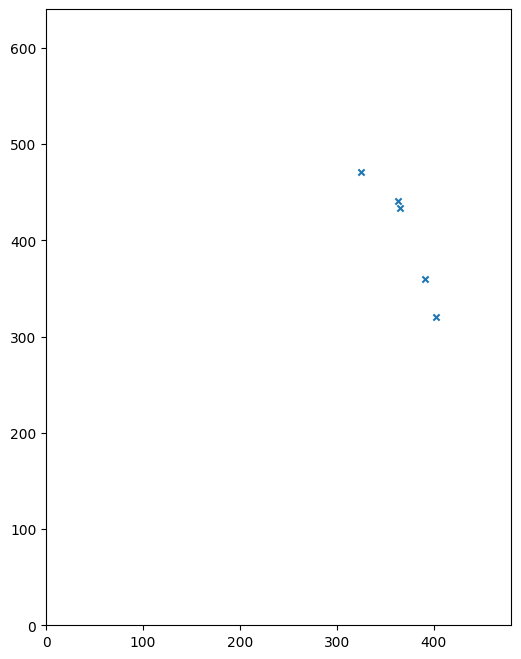

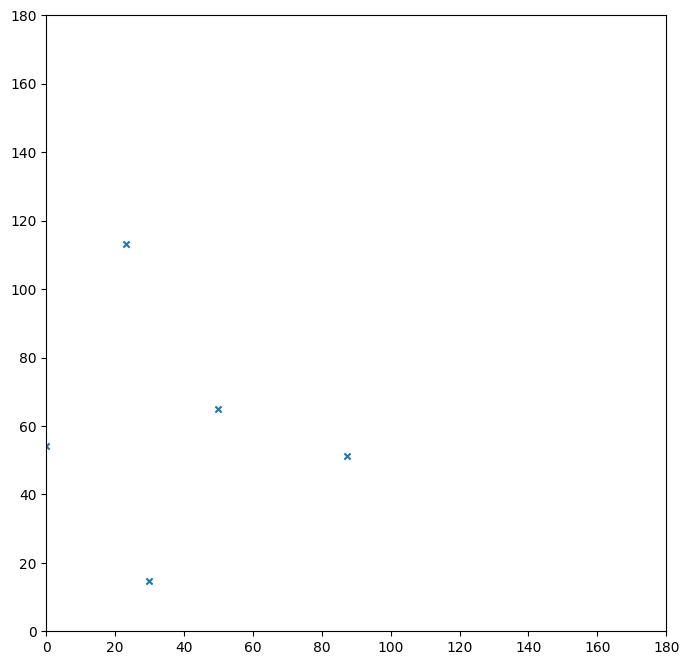

In [16]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((0, 180))
plt.ylim((0, 180))
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

In [14]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
print(ret)
if ret :
    print(ret)
    cv2.imwrite('./first_frame.jpg', frame)
    # cv2.imshow('test', frame)

# cap.release()
# cv2.destroyAllWindows()

True
True


In [4]:
import numpy as np

In [9]:
with open('./data.npy', 'rb') as f:
        a = np.load(f)
        b = np.load(f)
        c = np.load(f)

In [10]:
np.shape(a), np.shape(b), np.shape(c)

((2, 16), (2, 16), (2, 17))